<a href="https://colab.research.google.com/github/Habiba3495/ML_models_compare/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [ ]:
df_train=pd.read_csv("/content/titanic.csv")
df_test = pd.read_csv('/content/test (1).csv')

In [ ]:
df_train

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,0


In [ ]:
df_test

,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    19 non-null     int64  
 1   name      19 non-null     object 
 2   sex       19 non-null     object 
 3   age       18 non-nu

In [ ]:
train=df_train[['pclass','name','sex','age','sibsp','parch','ticket','fare','embarked','survived']]
test=df_test[['pclass','name','sex','age','sibSp','parch','ticket','fare','embarked']]

In [ ]:
train

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [ ]:
test

,pclass,name,sex,age,sibSp,parch,ticket,fare,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [ ]:
train['age'].fillna(train['age'].mean(), inplace=True)
test['age'].fillna(test['age'].mean(), inplace=True)

<ipython-input-9-1cd0946dd026>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'].fillna(train['age'].mean(), inplace=True)
<ipython-input-9-1cd0946dd026>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'].fillna(test['age'].mean(), inplace=True)


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   embarked  1307 non-null   object 
 9   survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    19 non-null     int64  
 1   name      19 non-null     object 
 2   sex       19 non-null     object 
 3   age       18 non-null     float64
 4   sibSp     19 non-nul

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())


pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
survived      0
dtype: int64
pclass      0
name        0
sex         0
age         1
sibSp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [ ]:
train=train.dropna()

In [ ]:
test=test.dropna()

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64
pclass      0
name        0
sex         0
age         0
sibSp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


In [ ]:
#remove duplicate data
train.drop_duplicates(inplace = True)
print(train.duplicated())

test.drop_duplicates(inplace = True)
print(test.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1301    False
1304    False
1306    False
1307    False
1308    False
Length: 1043, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
dtype: bool


<ipython-input-14-f84d6040ca3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop_duplicates(inplace = True)
<ipython-input-14-f84d6040ca3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop_duplicates(inplace = True)


In [ ]:
train['sex'] = train['sex'].replace('male', 0)
train['sex'] = train['sex'].replace('female', 1)

<ipython-input-15-a7a1d0f4caf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sex'] = train['sex'].replace('male', 0)
<ipython-input-15-a7a1d0f4caf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sex'] = train['sex'].replace('female', 1)


In [ ]:
train['embarked'] = train['embarked'].replace('S', 0)
train['embarked'] = train['embarked'].replace('C', 1)
train['embarked'] = train['embarked'].replace('Q', 2)

<ipython-input-16-8d67f97a1b14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['embarked'] = train['embarked'].replace('S', 0)
<ipython-input-16-8d67f97a1b14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['embarked'] = train['embarked'].replace('C', 1)
<ipython-input-16-8d67f97a1b14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
train

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,0,1
1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,0,1
2,1,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,0,0
...,...,...,...,...,...,...,...,...,...,...
1301,3,"Youseff, Mr. Gerious",0,45.5000,0,0,2628,7.2250,1,0
1304,3,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,1,0
1306,3,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,1,0
1307,3,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,1,0


In [ ]:
test['sex'] = test['sex'].replace('male', 0)
test['sex'] = test['sex'].replace('female', 1)

<ipython-input-18-5266c5d63145>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sex'] = test['sex'].replace('male', 0)
<ipython-input-18-5266c5d63145>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sex'] = test['sex'].replace('female', 1)


In [ ]:
test['embarked'] = test['embarked'].replace('S', 0)
test['embarked'] = test['embarked'].replace('C', 1)
test['embarked'] = test['embarked'].replace('Q', 2)

<ipython-input-19-8685f9540b37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['embarked'] = test['embarked'].replace('S', 0)
<ipython-input-19-8685f9540b37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['embarked'] = test['embarked'].replace('C', 1)
<ipython-input-19-8685f9540b37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
test

,pclass,name,sex,age,sibSp,parch,ticket,fare,embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0
5,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,0
6,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,2
7,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,0
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,1
9,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,0


In [ ]:
# Outlier detection
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers
# detect outliers from Pclass, Sex, Age,  SibSp , Parch, Fare and Embarked
Outliers_to_drop = detect_outliers(train,2,['pclass','sex','age','sibsp','parch','fare','embarked'])
train.loc[Outliers_to_drop]
print(len(Outliers_to_drop))

0


In [ ]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1043 non-null   int64  
 1   name      1043 non-null   object 
 2   sex       1043 non-null   int64  
 3   age       1043 non-null   float64
 4   sibsp     1043 non-null   int64  
 5   parch     1043 non-null   int64  
 6   ticket    1043 non-null   object 
 7   fare      1043 non-null   float64
 8   embarked  1043 non-null   int64  
 9   survived  1043 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 81.6+ KB


In [ ]:
# Outlier detection
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers
# detect outliers from Pclass, Sex, Age,  SibSp , Parch, Fare and Embarked
Outliers_to_drop = detect_outliers(test,2,['pclass','sex','age','sibSp','parch','fare','embarked'])
test.loc[Outliers_to_drop]
print(len(Outliers_to_drop))

0


In [ ]:
# test = test.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 18
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    18 non-null     int64  
 1   name      18 non-null     object 
 2   sex       18 non-null     int64  
 3   age       18 non-null     float64
 4   sibSp     18 non-null     int64  
 5   parch     18 non-null     int64  
 6   ticket    18 non-null     object 
 7   fare      18 non-null     float64
 8   embarked  18 non-null     int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 1.9+ KB


In [ ]:
train.describe()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.370086,29.813199,0.504314,0.421860,36.603024,0.299137,0.407478
std,0.840685,0.483059,14.366261,0.913080,0.840655,55.753648,0.553014,0.491601
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000
50%,2.000000,0.000000,28.000000,0.000000,0.000000,15.750000,0.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000,1.000000,35.077100,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000


In [ ]:
test.describe()

,pclass,sex,age,sibSp,parch,fare,embarked
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.421053,0.421053,32.638889,0.526316,0.105263,20.066232,0.578947
std,0.768533,0.507257,14.165496,0.611775,0.315302,20.221058,0.837708
min,1.000000,0.000000,14.000000,0.000000,0.000000,7.000000,0.000000
25%,2.000000,0.000000,22.500000,0.000000,0.000000,7.862500,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,9.687500,0.000000
75%,3.000000,1.000000,40.500000,1.000000,0.000000,26.000000,1.000000
max,3.000000,1.000000,63.000000,2.000000,1.000000,82.266700,2.000000


In [ ]:
cdf_train = train[['pclass','sex','age','sibsp','parch','fare','embarked','survived']]
cdf_train

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,1,29.0000,0,0,211.3375,0,1
1,1,0,0.9167,1,2,151.5500,0,1
2,1,1,2.0000,1,2,151.5500,0,0
3,1,0,30.0000,1,2,151.5500,0,0
4,1,1,25.0000,1,2,151.5500,0,0
...,...,...,...,...,...,...,...,...
1038,3,0,45.5000,0,0,7.2250,1,0
1039,3,1,14.5000,1,0,14.4542,1,0
1040,3,0,26.5000,0,0,7.2250,1,0
1041,3,0,27.0000,0,0,7.2250,1,0


In [ ]:
cdf_test = test[['pclass','sex','age','sibSp','parch','fare','embarked']]
cdf_test.rename(columns = {'sibSp':'sibsp'}, inplace = True)
cdf_test

<ipython-input-29-3f3dc822afbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_test.rename(columns = {'sibSp':'sibsp'}, inplace = True)


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
5,3,0,14.0,0,0,9.2250,0
6,3,1,30.0,0,0,7.6292,2
7,2,0,26.0,1,1,29.0000,0
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,0


<Axes: >

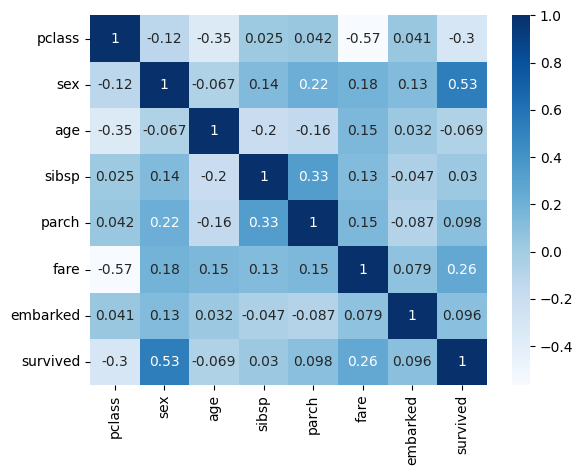

In [ ]:
df_corr = cdf_train.corr()
sns.heatmap(df_corr, cmap="Blues",annot=True)

In [ ]:
X = cdf_train[['pclass','sex','age','sibsp','parch','fare','embarked']]  # features
Y = cdf_train[['survived']] # target


In [ ]:
# Split data into training and testing
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the KNN classifier on the training data
knn_classifier.fit(x_train, y_train)

# Predict labels for the test data
y_pred = knn_classifier.predict(x_test)

# Evaluate the accuracy of the model
knn_accuracy = accuracy_score(y_test, y_pred) *100
print("Accuracy=", knn_accuracy)

Accuracy= 60.76555023923444


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
classification_report_knn = classification_report(y_test, y_pred)
print(classification_report_knn)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       121
           1       0.53      0.52      0.53        88

    accuracy                           0.61       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.61      0.61      0.61       209



In [ ]:
# Define a list of distance metrics to experiment with
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

# Iterate over each distance metric
for metric in distance_metrics:
    # Create a KNN classifier with the current distance metric
    knn_classifier = KNeighborsClassifier(n_neighbors=5, metric=metric)

    # Train the KNN classifier on the training data
    knn_classifier.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = knn_classifier.predict(x_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred) *100

    # Print the accuracy and distance metric
    print(f"Accuracy with {metric.capitalize()} distance metric:", accuracy)

Accuracy with Euclidean distance metric: 60.76555023923444
Accuracy with Manhattan distance metric: 63.1578947368421
Accuracy with Chebyshev distance metric: 64.11483253588517


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
# Define a range of k values to experiment with
k_values = [1, 3, 5, 7, 9]

# Initialize variables to store best k and corresponding accuracy
best_k = None
best_accuracy = 0

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN classifier on the training data
    knn_classifier.fit(x_train, y_train)

    # Predict labels for the validation data
    y_pred = knn_classifier.predict(x_test)

    # Compute accuracy for the current k value
    accuracy = accuracy_score(y_test, y_pred) *100

    # Update best k and accuracy if current accuracy is higher
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Print the best k and corresponding accuracy
print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Best k: 3
Best Accuracy: 66.02870813397129


In [ ]:
#Make prediction on test data
y_new_pred = knn_classifier.predict(cdf_test)
y_new_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(x_train, y_train)

# Predict the labels for test data
y_pred_gnb = gnb.predict(x_test)

# Calculate the accuracy of the classifier
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy:", gnb_accuracy)

Accuracy: 75.11961722488039


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classification_report_gnb = classification_report(y_test, y_pred_gnb)
print(classification_report_gnb)

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       121
           1       0.69      0.74      0.71        88

    accuracy                           0.75       209
   macro avg       0.75      0.75      0.75       209
weighted avg       0.75      0.75      0.75       209



In [ ]:
y_new_pred = gnb.predict(cdf_test)
y_new_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize the SVM classifier
svm_classifier = SVC()  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the classifier on the training data
svm_classifier.fit(x_train, y_train)

# Predict labels for test data
y_pred_svm = svm_classifier.predict(x_test)

# Calculate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy:", svm_accuracy)

Accuracy: 62.67942583732058


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
classification_report_svm = classification_report(y_test, y_pred_svm)
print(classification_report_svm)


              precision    recall  f1-score   support

           0       0.64      0.83      0.72       121
           1       0.60      0.35      0.44        88

    accuracy                           0.63       209
   macro avg       0.62      0.59      0.58       209
weighted avg       0.62      0.63      0.60       209



In [ ]:
y_new_pred = svm_classifier.predict(cdf_test)
y_new_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [ ]:
# Define the parameter grid to search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel functions
    'C': [0.1, 1, 10, 100]  # Regularization parameters
}

# Initialize the SVM classifier
svm_classifier = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict labels for test data using the best model
y_pred = best_model.predict(x_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)*100
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Parameters: {'C': 100, 'kernel': 'linear'}
Accuracy: 76.55502392344498


In [ ]:
models = pd.DataFrame({
    'Model': ['knn', 'gnb', 'svm'],
    'Accuracy': [knn_accuracy, gnb_accuracy, svm_accuracy]
})

models_sorted = models.sort_values(by='Accuracy', ascending=False)

print(models_sorted)

  Model   Accuracy
1   gnb  75.119617
2   svm  62.679426
0   knn  60.765550


In [ ]:
models = pd.DataFrame({
    'Model': ['knn', 'gnb', 'svm'],
    'classification_report': [classification_report_knn, classification_report_gnb, classification_report_svm]
})

models_sorted = models.sort_values(by='classification_report', ascending=False)

print(models_sorted)

  Model                              classification_report
1   gnb                precision    recall  f1-score   ...
0   knn                precision    recall  f1-score   ...
2   svm                precision    recall  f1-score   ...


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:

# Calculate additional evaluation metrics
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

gnb_precision = precision_score(y_test, y_pred_gnb)
gnb_recall = recall_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb)

svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Create a DataFrame to store evaluation metrics
models = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'SVM'],
    'Accuracy': [knn_accuracy, gnb_accuracy, svm_accuracy],
    'Precision': [knn_precision, gnb_precision, svm_precision],
    'Recall': [knn_recall, gnb_recall, svm_recall],
    'F1-score': [knn_f1, gnb_f1, svm_f1]
})


# Sort the DataFrame by accuracy in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False)

print(models_sorted)

         Model   Accuracy  Precision    Recall  F1-score
1  Naive Bayes  75.119617   0.691489  0.738636  0.714286
2          SVM  62.679426   0.596154  0.352273  0.442857
0          KNN  60.765550   0.534884  0.522727  0.528736
